<a href="https://colab.research.google.com/github/bingsen-wang/Electric-Machines/blob/main/3PhaseACmachineCoupledCircuitModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Coupled Circuit Model of 3-Phase AC Machines</h1></b>

Dr. Bingsen Wang

7/19/2025
</center>

#Python Code

0
0
50
100
150
200
250
300
350
400
450
0


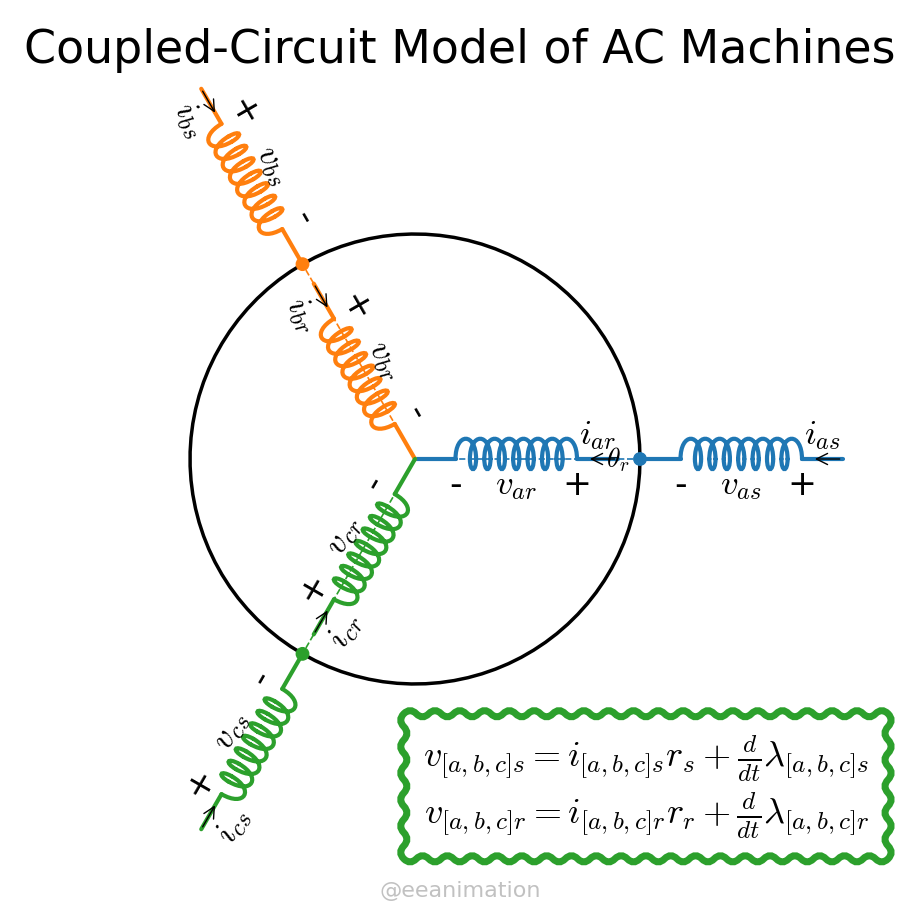

In [145]:
from matplotlib import pyplot,animation,path,transforms,cm,patches
import numpy as np
pyplot.rcParams.update({"font.family":"sans-serif", "mathtext.fontset":"cm"})

c2ri=lambda c:[np.array(c).real,np.array(c).imag]
ri2c=lambda r,i:r+1j*i
d2r=lambda d:d*np.pi/180; r2d=lambda r:r*180/np.pi;

#draw inductor symbol
def draw_inductor(ax,x0,y0,n,w,h,theta=0,lw=1,color='k',alpha=1):
    w= w/(0.7*n+0.3)#width of larger coil
    verts = [[(.7*k*w,0),(.7*k*w,h),((.7*k+1)*w,h),((.7*k+1)*w,0)] for k in range(n)]
    verts = sum(verts+[[(.7*k*w,0),(.7*k*w,-h/2),((.7*k+.3)*w,-h/2),((.7*k+.3)*w,0)] for k in range(1,n)],[])
    codes = sum([[path.Path.MOVETO]+[path.Path.CURVE4]*3]*(2*n-1),[])
    t=transforms.Affine2D().translate(x0,y0).rotate_around(x0,y0,theta)+ax.transData
    ax.add_patch(patches.PathPatch(path.Path(verts,codes),ec=color,alpha=alpha,fc='None',lw=lw,capstyle='round',transform=t))
    return

def draw1Ph(ax,xy0,w,h,lw=2,theta=0,color='k',Ncoil=5,ts=20,tc='k',txt=['']*2):
  draw_inductor(ax,*c2ri(ri2c(*xy0)+.2*w*np.exp(1j*theta)),Ncoil,.6*w,h,lw=lw,theta=theta,color=color)
  ax.plot(*c2ri(ri2c(*xy0)+np.array([0,.2*w,np.nan,.8*w,w])*np.exp(1j*theta)),lw=lw,c=color,solid_capstyle='round')
  [ax.text(*c2ri(ri2c(*xy0)+((.2+k*.3)*w-.055j)*np.exp(1j*theta)),['-',txt[0],'+'][k],
           size=ts,c=tc,va='center',ha='center',rotation=(r2d(theta)+90)%180-90)for k in range(3)]
  [ax.text(*c2ri(ri2c(*xy0)+(.9*w+.055j)*np.exp(1j*theta)),txt[1],
           size=ts,c=tc,va='center',ha='center',rotation=(r2d(theta)+90)%180-90)]
  ax.add_patch(patches.FancyArrowPatch(c2ri(ri2c(*xy0)+w*np.exp(1j*theta)),c2ri(ri2c(*xy0)+.85*w*np.exp(1j*theta)),arrowstyle='->',mutation_scale=20,zorder=3)),
  return

def draw3Ph(ax,xy0,w,h,lw=2,theta=0,color=['k']*3,Ncoil=5,txt=['']*6,ts=25):
  [draw1Ph(ax,c2ri(ri2c(*xy0)*np.exp(1j*(k*2*np.pi/3+theta))),w,h,txt=[txt[k],txt[k+3]],ts=ts,
           lw=lw,theta=theta+k*2*np.pi/3,color=color[k],Ncoil=Ncoil)for k in range(3)]
  return
def drawMotor(ax,r,ws,wr,h,lw=2,theta_r=0,color=['k']*3,Ncoil=5):
  draw3Ph(ax1,(r,0),ws,h,color=color,lw=lw,Ncoil=Ncoil,txt=['$v_{as}$','$v_{bs}$','$v_{cs}$','$i_{as}$','$i_{bs}$','$i_{cs}$']) #stator
  draw3Ph(ax1,(0,0),wr,h,theta=theta_r,color=color,lw=lw,Ncoil=Ncoil,txt=['$v_{ar}$','$v_{br}$','$v_{cr}$','$i_{ar}$','$i_{br}$','$i_{cr}$']) #rotor
  ax.plot(*c2ri(r*np.exp(1j*np.linspace(0,2*np.pi,100))),lw=2.5,c='k',zorder=-3)
  [ax.plot(*c2ri([0,r*np.exp(1j*k*2*np.pi/3)]),'--',lw=1.2,c=cl[k],zorder=-3)for k in range(3)]
  ax.plot(*c2ri(wr*.9*np.exp(1j*np.linspace(0,theta_r,100))),lw=1.2,c=cl[0],zorder=-3,alpha=.6) #rotor angle
  ax.text(*c2ri(wr*np.exp(1j*theta_r/2)),r'$\theta_r$',size=20,va='center',ha='center',rotation=(r2d(theta_r/2)+90)%180-90)
  ax.scatter(*c2ri(r*np.exp(1j*np.linspace(0,np.pi*4/3,3))),s=80,c=cl[:3])
  return

Nf=480;t=np.linspace(0,2*np.pi,Nf)
cl = list(cm.tab10.colors) #colors of lines
fig = pyplot.figure(figsize=([9,9]));
ax=fig.add_axes([0,0,1,1],xlim=[-1.1,1.1],ylim=[-1.1,1.1]);ax.axis('off')
ax1=fig.add_axes([0,0,1,1],xlim=[-.9,1.1],ylim=[-1,1],fc='none')
ax.text(0,1,r"Coupled-Circuit Model of AC Machines",size=33,ha='center',va='center')
ax.text(1,-.8,r"$v_{[a,b,c]s}=i_{[a,b,c]s}r_s+\frac{d}{dt}\lambda_{[a,b,c]s}$"+'\n'+
        r"$v_{[a,b,c]r}=i_{[a,b,c]r}r_r+\frac{d}{dt}\lambda_{[a,b,c]r}$",size=26,ha='right',va='center',
        bbox=dict(fc='none',ec=cl[2],boxstyle='roundtooth',lw=5,pad=.7))

def animate(i):
  xlim,ylim=ax1.get_xlim(),ax1.get_ylim(); ax1.clear(); ax1.set_xlim(xlim); ax1.set_ylim(ylim);ax1.axis('off')
  drawMotor(ax1,.5,.45,.45,.06,lw=3,theta_r=t[i],color=cl[:3],Ncoil=8)
  return

ax.text(np.average(ax.get_xlim()),ax.get_ylim()[0]*.99+ax.get_ylim()[1]*.01,r'@eeanimation',size=16,c='.2',alpha=.3,ha='center',va='bottom')
anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=20)
anim.save("acMachineModel.mp4",writer=animation.FFMpegWriter(fps=60),dpi=200)